In [175]:
import pandas as pd

file_url = 'https://raw.githubusercontent.com/ajayt0m/Forecasting_Crop_Prices_Maharashtra/Univariate_Standardized/onion_daily_cleaned.csv'

onion_df = pd.read_csv(file_url)

In [176]:
#Set index as date
onion_df.index  = pd.to_datetime(onion_df['date_arrival'], format = '%Y-%m-%d')

In [177]:
onion_df['date_arrival'] = pd.to_datetime(onion_df['date_arrival'], format = '%Y-%m-%d')

In [178]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(onion_df.head(10))

,date_arrival,MIN,MAX,MODAL,Arrival
date_arrival,,,,,
2021-01-01,2021-01-01,865.15,2706.88,2060.60,11575.0
2021-01-02,2021-01-02,1105.07,2720.16,2181.84,15560.0
2021-01-03,2021-01-03,1129.41,2741.47,2141.18,3954.0
2021-01-04,2021-01-04,967.31,2754.16,2167.55,21441.0
2021-01-05,2021-01-05,1188.84,2793.71,2275.47,21526.0
2021-01-06,2021-01-06,1335.29,2698.00,2242.65,7103.0
2021-01-07,2021-01-07,1335.29,2698.00,2242.65,7103.0
2021-01-08,2021-01-08,1335.29,2698.00,2242.65,7103.0
2021-01-09,2021-01-09,1160.00,3223.00,2832.40,3389.0


In [179]:
onion_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2021-01-01 to 2023-10-01
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_arrival  1004 non-null   datetime64[ns]
 1   MIN           1004 non-null   float64       
 2   MAX           1004 non-null   float64       
 3   MODAL         1004 non-null   float64       
 4   Arrival       1004 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 47.1 KB


<AxesSubplot: xlabel='date_arrival'>

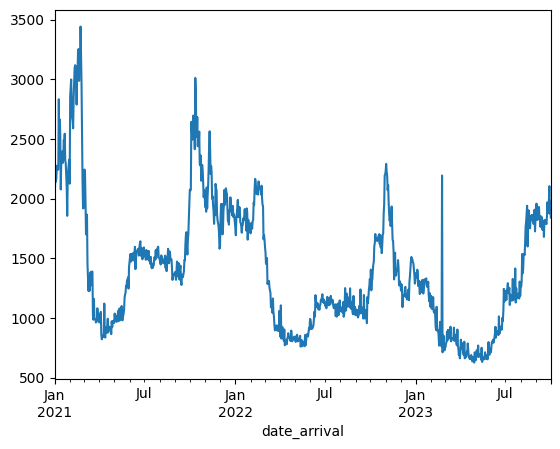

In [180]:
price = onion_df['MODAL']
price.plot()

In [181]:
with pd.option_context("display.max_columns", None, "display.max_rows", None):
    display(price.head(10))

date_arrival
2021-01-01    2060.60
2021-01-02    2181.84
2021-01-03    2141.18
2021-01-04    2167.55
2021-01-05    2275.47
2021-01-06    2242.65
2021-01-07    2242.65
2021-01-08    2242.65
2021-01-09    2832.40
2021-01-10    2375.00
Name: MODAL, dtype: float64

In [182]:
import numpy as np

def df_to_X_y(df, window_size=5):
  indices = df.index
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y), indices

In [183]:
WINDOW_SIZE = 15
X, y, indices  = df_to_X_y(price, WINDOW_SIZE)
X.shape, y.shape

((989, 15, 1), (989,))

In [184]:
X

array([[[2060.6 ],
        [2181.84],
        [2141.18],
        ...,
        [2076.5 ],
        [2319.16],
        [2391.25]],

       [[2181.84],
        [2141.18],
        [2167.55],
        ...,
        [2319.16],
        [2391.25],
        [2394.59]],

       [[2141.18],
        [2167.55],
        [2275.47],
        ...,
        [2391.25],
        [2394.59],
        [2298.81]],

       ...,

       [[1738.89],
        [1765.26],
        [1811.44],
        ...,
        [1878.12],
        [1978.39],
        [2104.41]],

       [[1765.26],
        [1811.44],
        [1678.89],
        ...,
        [1978.39],
        [2104.41],
        [1874.3 ]],

       [[1811.44],
        [1678.89],
        [1819.26],
        ...,
        [2104.41],
        [1874.3 ],
        [1982.  ]]])

In [185]:
X_train, y_train = X[:800], y[:800]
X_val, y_val = X[800:900], y[800:900]
X_test, y_test = X[900:], y[900:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((800, 15, 1), (800,), (100, 15, 1), (100,), (89, 15, 1), (89,))

In [186]:
y_test

array([1245.83, 1291.2 , 1210.6 , 1206.83, 1252.27, 1108.48, 1195.57,
       1171.26, 1185.87, 1143.76, 1148.9 , 1326.93, 1149.9 , 1256.03,
       1202.81, 1212.54, 1414.06, 1129.23, 1248.93, 1162.05, 1166.28,
       1184.36, 1191.72, 1204.6 , 1162.71, 1304.72, 1184.25, 1256.28,
       1261.52, 1306.15, 1535.75, 1373.94, 1406.93, 1521.04, 1535.14,
       1526.87, 1629.05, 1765.82, 1803.41, 1866.24, 1940.02, 1598.5 ,
       1846.82, 1901.62, 1858.09, 1802.04, 1750.25, 1840.98, 1831.78,
       1861.85, 1817.04, 1862.65, 1826.  , 1788.54, 1810.16, 1906.7 ,
       1725.  , 1837.94, 1828.39, 1957.6 , 1820.24, 1889.37, 1898.  ,
       1926.74, 1929.74, 1819.7 , 1851.77, 1762.44, 1850.85, 1820.98,
       1843.26, 1738.89, 1765.26, 1811.44, 1678.89, 1819.26, 1818.48,
       1821.37, 1801.32, 1785.52, 1840.66, 1968.27, 1912.86, 1878.12,
       1978.39, 2104.41, 1874.3 , 1982.  , 1840.33])

In [187]:
price_training_mean = np.mean(X_train[:, :, 0]).round(2)
price_training_std = np.std(X_train[:, :, 0]).round(2)

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - price_training_mean) / price_training_std
  return X

In [188]:
price_training_mean

1463.23

In [189]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

array([[[-1.01822268],
        [-1.05914411],
        [-1.00206012],
        ...,
        [-0.44358086],
        [-0.58649686],
        [-0.43391703]],

       [[-1.05914411],
        [-1.00206012],
        [-1.00129226],
        ...,
        [-0.58649686],
        [-0.43391703],
        [-0.40715423]],

       [[-1.00206012],
        [-1.00129226],
        [-1.05045416],
        ...,
        [-0.43391703],
        [-0.40715423],
        [-0.32218373]],

       ...,

       [[ 0.51626557],
        [ 0.56565221],
        [ 0.65213971],
        ...,
        [ 0.77702032],
        [ 0.96480944],
        [ 1.20082405]],

       [[ 0.56565221],
        [ 0.65213971],
        [ 0.4038955 ],
        ...,
        [ 0.96480944],
        [ 1.20082405],
        [ 0.76986609]],

       [[ 0.65213971],
        [ 0.4038955 ],
        [ 0.66678528],
        ...,
        [ 1.20082405],
        [ 0.76986609],
        [ 0.97157037]]])

In [215]:
def preprocess_output(y):
  y[:,] = (y[:,] - price_training_mean) / price_training_std 
  return y

In [216]:
preprocess_output(y_train)
preprocess_output(y_val)
preprocess_output(y_test)

array([-0.40715423, -0.32218373, -0.47313419, -0.48019477, -0.39509317,
       -0.66438805, -0.50128289, -0.5468115 , -0.51944939, -0.59831445,
       -0.58868808, -0.25526735, -0.58681524, -0.38805132, -0.48772357,
       -0.46950089, -0.09208727, -0.62552673, -0.40134844, -0.56406031,
       -0.55613822, -0.52227737, -0.5084933 , -0.4843712 , -0.56282423,
       -0.296863  , -0.52248338, -0.38758311, -0.37776945, -0.29418485,
        0.13581796, -0.1672254 , -0.10544058,  0.10826856,  0.13467553,
        0.11918719,  0.31055342,  0.566701  ,  0.63710085,  0.75477105,
        0.89294878,  0.25333833,  0.7184006 ,  0.82103193,  0.73950744,
        0.63453507,  0.53754097,  0.70746325,  0.69023317,  0.7465493 ,
        0.66262759,  0.74804757,  0.67940818,  0.6092518 ,  0.64974249,
        0.83054593,  0.4902519 ,  0.70176983,  0.68388426,  0.92587321,
        0.66862066,  0.79808971,  0.81425227,  0.86807754,  0.87369604,
        0.66760933,  0.72767113,  0.56037082,  0.72594812,  0.67

In [218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((15, 1)))
model1.add(LSTM(136, activation='relu'))
model1.add(Dense(1))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 136)               75072     
                                                                 
 dense_3 (Dense)             (None, 1)                 137       
                                                                 
Total params: 75209 (293.79 KB)
Trainable params: 75209 (293.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [219]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [220]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks=[cp1])

Epoch 1/20
23/25 [==========================>...] - ETA: 0s - loss: 0.9247 - root_mean_squared_error: 0.9616INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 4s 109ms/step - loss: 0.8998 - root_mean_squared_error: 0.9486 - val_loss: 1.2649 - val_root_mean_squared_error: 1.1247
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.7584 - root_mean_squared_error: 0.8709INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 81ms/step - loss: 0.7584 - root_mean_squared_error: 0.8709 - val_loss: 0.8601 - val_root_mean_squared_error: 0.9274
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.6109 - root_mean_squared_error: 0.7816INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 3s 104ms/step - loss: 0.6109 - root_mean_squared_error: 0.7816 - val_loss: 0.3650 - val_root_mean_squared_error: 0.6042
Epoch 4/20
23/25 [==========================>...] - ETA: 0s - loss: 0.4464 - root_mean_squared_error: 0.6682INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 93ms/step - loss: 0.4504 - root_mean_squared_error: 0.6711 - val_loss: 0.0589 - val_root_mean_squared_error: 0.2427
Epoch 5/20
24/25 [===========================>..] - ETA: 0s - loss: 0.3234 - root_mean_squared_error: 0.5687INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 87ms/step - loss: 0.3204 - root_mean_squared_error: 0.5660 - val_loss: 0.0415 - val_root_mean_squared_error: 0.2036
Epoch 6/20
25/25 [==============================] - 0s 18ms/step - loss: 0.1989 - root_mean_squared_error: 0.4460 - val_loss: 0.0545 - val_root_mean_squared_error: 0.2334
Epoch 7/20
25/25 [==============================] - 0s 18ms/step - loss: 0.1712 - root_mean_squared_error: 0.4137 - val_loss: 0.0436 - val_root_mean_squared_error: 0.2087
Epoch 8/20
25/25 [==============================] - 0s 19ms/step - loss: 0.1534 - root_mean_squared_error: 0.3917 - val_loss: 0.0532 - val_root_mean_squared_error: 0.2306
Epoch 9/20
25/25 [==============================] - ETA: 0s - loss: 0.1360 - root_mean_squared_error: 0.3688INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 76ms/step - loss: 0.1360 - root_mean_squared_error: 0.3688 - val_loss: 0.0326 - val_root_mean_squared_error: 0.1806
Epoch 10/20
25/25 [==============================] - 0s 19ms/step - loss: 0.1242 - root_mean_squared_error: 0.3524 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1986
Epoch 11/20
25/25 [==============================] - 0s 17ms/step - loss: 0.1133 - root_mean_squared_error: 0.3366 - val_loss: 0.0579 - val_root_mean_squared_error: 0.2406
Epoch 12/20
25/25 [==============================] - 1s 21ms/step - loss: 0.1120 - root_mean_squared_error: 0.3347 - val_loss: 0.0537 - val_root_mean_squared_error: 0.2317
Epoch 13/20
25/25 [==============================] - ETA: 0s - loss: 0.1067 - root_mean_squared_error: 0.3266INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


25/25 [==============================] - 2s 92ms/step - loss: 0.1067 - root_mean_squared_error: 0.3266 - val_loss: 0.0193 - val_root_mean_squared_error: 0.1389
Epoch 14/20
25/25 [==============================] - 1s 37ms/step - loss: 0.0989 - root_mean_squared_error: 0.3146 - val_loss: 0.0354 - val_root_mean_squared_error: 0.1883
Epoch 15/20
25/25 [==============================] - 1s 31ms/step - loss: 0.0971 - root_mean_squared_error: 0.3116 - val_loss: 0.0225 - val_root_mean_squared_error: 0.1501
Epoch 16/20
25/25 [==============================] - 1s 21ms/step - loss: 0.0942 - root_mean_squared_error: 0.3069 - val_loss: 0.0263 - val_root_mean_squared_error: 0.1622
Epoch 17/20
25/25 [==============================] - 0s 16ms/step - loss: 0.0881 - root_mean_squared_error: 0.2968 - val_loss: 0.0304 - val_root_mean_squared_error: 0.1743
Epoch 18/20
25/25 [==============================] - 0s 17ms/step - loss: 0.0875 - root_mean_squared_error: 0.2958 - val_loss: 0.0212 - val_root_mean_sq

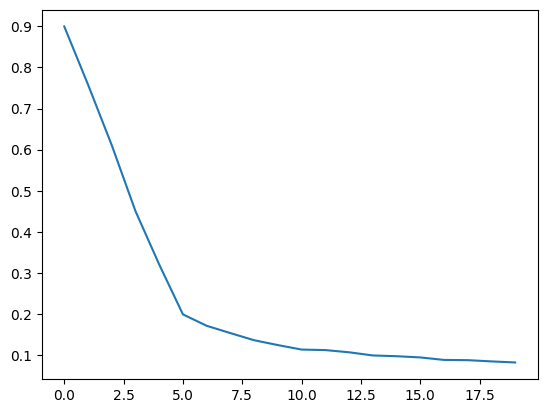

In [221]:
import matplotlib.pyplot as plt

loss_per_epoch = model1.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [222]:
def postprocess(arr):
  arr = (arr*price_training_std) + price_training_mean
  return arr.round(3)

In [223]:
def get_predictions_postprocessed(model, X, y):
  predictions = model.predict(X).flatten()
  price_preds = postprocess(predictions)
  price_actuals = postprocess(y)
  df = pd.DataFrame(data={'Price Predictions': price_preds,
                          'Price Actuals':price_actuals,
                          })
  df.index = indices[-len(predictions):]
  return df

In [225]:
post_processed_df = get_predictions_postprocessed(model1, X_test, y_test)
post_processed_df

3/3 [==============================] - 0s 6ms/step


,Price Predictions,Price Actuals
date_arrival,,
2023-07-05,1153.147949,1245.83
2023-07-06,1174.400024,1291.20
2023-07-07,1200.522949,1210.60
2023-07-08,1211.248047,1206.83
2023-07-09,1219.847046,1252.27
...,...,...
2023-09-27,1849.995972,1978.39
2023-09-28,1872.343018,2104.41
2023-09-29,1911.366943,1874.30


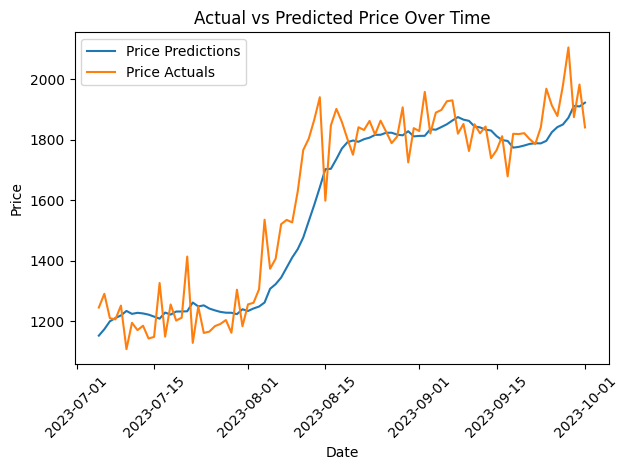

In [226]:
import matplotlib.pyplot as plt

plt.plot(post_processed_df.index, post_processed_df['Price Predictions'], label='Price Predictions')
plt.plot(post_processed_df.index, post_processed_df['Price Actuals'], label='Price Actuals')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price Over Time')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [228]:
post_processed_df

,Price Predictions,Price Actuals
date_arrival,,
2023-07-05,1153.147949,1245.83
2023-07-06,1174.400024,1291.20
2023-07-07,1200.522949,1210.60
2023-07-08,1211.248047,1206.83
2023-07-09,1219.847046,1252.27
...,...,...
2023-09-27,1849.995972,1978.39
2023-09-28,1872.343018,2104.41
2023-09-29,1911.366943,1874.30


In [229]:
#Full data points
post_processed_fulldf = get_predictions_postprocessed(model1, X, y)
post_processed_fulldf

31/31 [==============================] - 0s 8ms/step


,Price Predictions,Price Actuals
date_arrival,,
2021-01-16,2340.983887,2394.59
2021-01-17,2342.143066,2298.81
2021-01-18,2324.780029,2324.69
2021-01-19,2314.297119,2490.36
2021-01-20,2339.496094,2469.96
...,...,...
2023-09-27,1849.995972,1978.39
2023-09-28,1872.343018,2104.41
2023-09-29,1911.366943,1874.30


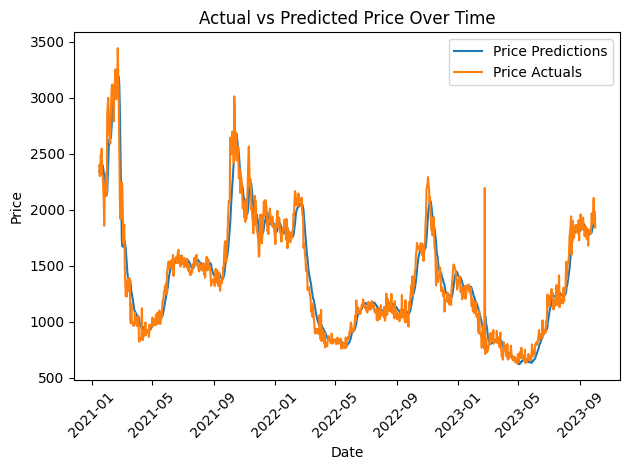

In [235]:
import matplotlib.pyplot as plt

plt.plot(post_processed_fulldf.index, post_processed_fulldf['Price Predictions'], label='Price Predictions')
plt.plot(post_processed_fulldf.index, post_processed_fulldf['Price Actuals'], label='Price Actuals')


plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price Over Time')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [239]:
import numpy as np

# Define the number of days to forecast 
forecast_days = 90


# Prepare input data for prediction
last_window = X_test[-1]  # Take the last window from the test data
forecast_input = last_window.copy()  # Initialize the input for forecasting

# Create an array to store the forecasted prices
forecasted_prices = []

# Loop to predict the next 90 days
for _ in range(forecast_days):
    # Predict the price for the next day
    forecasted_price = model1.predict(np.expand_dims(forecast_input, axis=0))[0, 0]
    
    # Add the forecasted price to the list
    forecasted_prices.append(forecasted_price)
    
    # Shift the input window by removing the first element and adding the forecasted price
    forecast_input = np.roll(forecast_input, shift=-1)
    forecast_input[-1] = forecasted_price

# Post-process the forecasted prices
forecasted_prices = np.array(forecasted_prices)
forecasted_prices = postprocess_output(forecasted_prices)

# Generate dates for the forecasted period
last_date = indices[-1]
forecasted_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_days)

# Create a DataFrame with forecasted dates and prices
forecast_df = pd.DataFrame(data={'Date': forecasted_dates, 'Forecasted Price': forecasted_prices})

# Display the forecasted DataFrame
print(forecast_df)

1/1 [==============================] - 0s 20ms/step


NameError: name 'postprocess_output' is not defined